In [44]:
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

prices = pd.read_csv('bvp_historical_prices_2020.csv')
fundamentals = pd.read_csv('bvp_emcloud_fundamentals.csv')

In [45]:
prices.head()

,Date,ADBE,APPF,AVLR,BL,BOX,COUP,CRM,CRWD,DBX,...,WDAY,WORK,ZEN,ZM,ZS,ZUO,OKTA,WIX,WK,YEXT
0,2/1/2020,334.429993,113.489998,78.050003,52.590000,17.240000,153.570007,166.990005,49.439999,18.090000,...,167.460007,23.020000,79.989998,68.720001,47.330002,14.76,117.31,127.55,43.36,14.64
1,3/1/2020,331.809998,112.269997,78.860001,52.810001,16.940001,159.580002,166.169998,50.750000,18.000000,...,168.440002,22.459999,78.349998,67.279999,47.380001,14.77,118.29,128.92,43.20,14.25
2,6/1/2020,333.709992,112.970001,80.070000,53.669998,17.320000,164.759995,173.449997,55.110001,18.530001,...,169.490005,23.520000,80.930000,70.320000,48.700001,14.67,123.43,131.63,43.45,14.77
3,7/1/2020,333.390015,114.169998,82.510002,53.470001,16.969999,165.759995,176.000000,54.750000,18.530001,...,172.949997,23.830000,78.680000,71.900002,48.400002,14.69,122.89,130.01,43.81,14.71
4,8/1/2020,337.869995,115.300003,82.139999,55.049999,16.860001,167.460007,177.330002,55.660000,18.459999,...,178.710007,23.770000,79.800003,72.550003,50.750000,14.66,125.55,133.78,44.09,14.77


In [46]:
fundamentals['YTD %'] = fundamentals['Symbol'].apply(lambda x: (prices[x].iloc[-1]/prices[x].iloc[0]-1)*100)
fundamentals.head()

,Company,Symbol,Price,Market Cap,EV / Annualized Revenue,EV / Forward Revenue,Efficiency,Revenue Growth Rate,Gross Margin,LTM FCF Margin,YTD %
0,"2U, Inc.",TWOU,47.15,3036.634624,4.361320,3.708269,0.3210,0.3486,0.6905,-0.0277,106.544824
1,Adobe Systems Incorporated,ADBE,446.92,214371.876864,17.160956,14.969824,0.4943,0.1399,0.8673,0.3544,35.234586
2,"Anaplan, Inc.",PLAN,44.89,6174.170624,14.259378,11.837598,0.3245,0.3694,0.7618,-0.0449,-15.712155
3,"AppFolio, Inc.",APPF,155.97,5348.881920,16.673387,14.096476,0.3802,0.2738,0.6618,0.1064,40.188571
4,Atlassian Corporation Plc,TEAM,177.47,43555.930112,24.713189,20.911805,0.5993,0.2866,0.8371,0.3127,44.856774


<IPython.core.display.Javascript object>


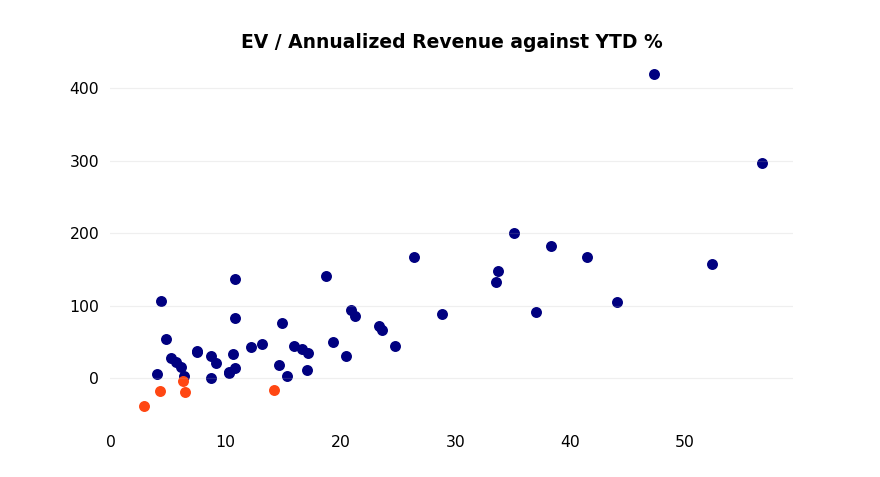

In [47]:
%matplotlib notebook
orange = (255,71,19)
yellow = (255,206,0)
green = (0,139,92)
dark_blue = (0,104,150)
turq = (0,144,158)
brightblue = (137,219,236)
navy = (0,0,128)
def color_converter(color):
    return tuple(map(lambda x: x/255, color))

stat_x = 'EV / Annualized Revenue'
stat_y = 'YTD %'

gains = fundamentals[fundamentals[stat_y] >= 0]
losses = fundamentals[fundamentals[stat_y] < 0]

x_gains = gains[stat_x]
y = fundamentals[stat_y]

y_gains = y[y>=0]
y_losses = y[y<0]

plt.figure()
fig = plt.gcf()
fig.set_size_inches(9, 6)
plt.scatter(gains[stat_x], gains[stat_y], c=color_converter(navy))
plt.scatter(losses[stat_x], losses[stat_y], c=color_converter(orange))
ymin, ymax = plt.ylim()
ax = plt.gca()
ax.set_ylim(ymin, ymax)
plt.title('{} against {}'.format(stat_x, stat_y), fontweight='bold')
remove_spines = ['right', 'top', 'bottom', 'left']
for spine in remove_spines:
    ax.spines[spine].set_visible(False)
plt.grid(which='major',axis='y', alpha=0.2)
plt.tick_params(bottom=False, labelbottom=True, left=False)

Would be interesting to see if there's value in the stocks with low EV/Forward Revenue. Cite Two Sigma paper to find out more about how to gauge efficiency